<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#With-Generated-Dataset" data-toc-modified-id="With-Generated-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>With Generated Dataset</a></span><ul class="toc-item"><li><span><a href="#Generate-the-dataset" data-toc-modified-id="Generate-the-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate the dataset</a></span></li></ul></li><li><span><a href="#With-MNIST-dataset" data-toc-modified-id="With-MNIST-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>With MNIST dataset</a></span><ul class="toc-item"><li><span><a href="#Get-the-MNIST-data" data-toc-modified-id="Get-the-MNIST-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the MNIST data</a></span></li><li><span><a href="#Simple-MNIST-Classification-with-Logistic-Regression" data-toc-modified-id="Simple-MNIST-Classification-with-Logistic-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simple MNIST Classification with Logistic Regression</a></span></li><li><span><a href="#Simple-MNIST-Classification-with-kNN" data-toc-modified-id="Simple-MNIST-Classification-with-kNN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simple MNIST Classification with kNN</a></span></li></ul></li></ul></div>

# Classification with TensorFlow <a class="tocSkip">

In [1]:
import tensorflow as tf
print('TensorFlow:{}'.format(tf.__version__))
tf.set_random_seed(123)

import numpy as np
print('NumPy:{}'.format(np.__version__))
np.random.seed(123)

import matplotlib.pyplot as plt

import sklearn as sk
print('Scikit Learn:{}'.format(sk.__version__))
from sklearn import model_selection as skms
from sklearn import datasets as skds

import os

TensorFlow:1.11.0
NumPy:1.14.5
Scikit Learn:0.19.1


In [2]:
DATASETSLIB_HOME = '../datasetslib'

In [3]:
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

In [4]:
#datasets.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

# With Generated Dataset

## Generate the dataset 

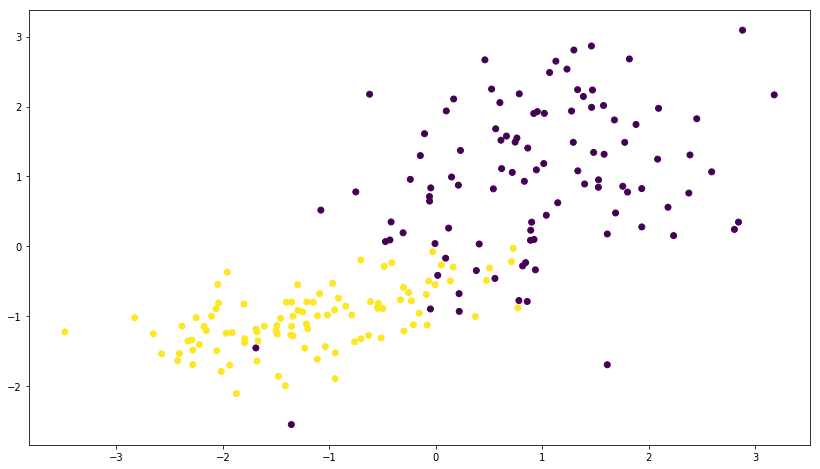

In [5]:
num_outputs = 2
num_inputs = 2
X, y = skds.make_classification(n_samples=200,
                                n_features=num_inputs,
                                n_informative=2,
                                n_redundant=0,
                                n_repeated=0,
                                n_classes=num_outputs,
                                n_clusters_per_class=1)
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

Then we use the NumPy eye function to convert y to one-hot encoded targets:


In [6]:
print(y[0:5])
y = np.eye(num_outputs)[y]
print(y[0:5])
X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y, test_size=.4, random_state=42)

[1 1 0 1 1]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [7]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]
print(num_inputs,num_outputs)

2 2


In [8]:
print(X_train.shape,y_train.shape)

(120, 2) (120, 2)


In [9]:
learning_rate = 0.001

# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

In [10]:
# model paramteres
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), name="w")
b = tf.Variable(tf.zeros([num_outputs]), name="b")
model = tf.nn.sigmoid(tf.matmul(x, w) + b)


In [11]:
loss = tf.reduce_mean(-tf.reduce_sum(
    (y * tf.log(model)) + ((1 - y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

epoch 0000  accuracy=0.93750000


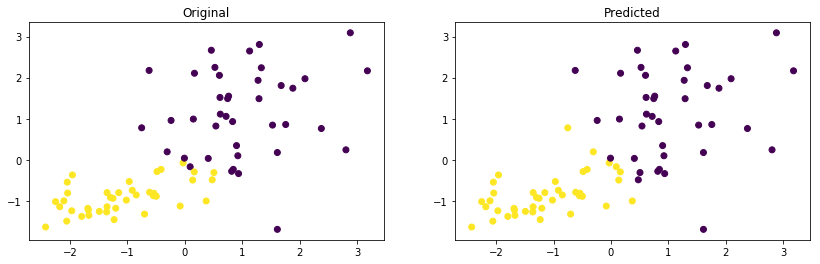

epoch 0001  accuracy=0.93750000


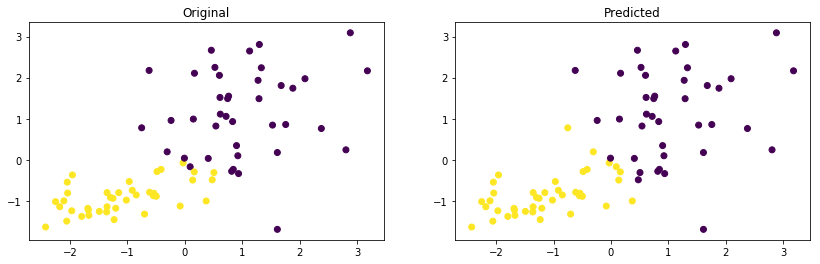

In [12]:
num_epochs = 2
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        y_pred = tfs.run(tf.argmax(model, 1), feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y: y_test})

        preds_check = tf.equal(y_pred, y_orig)
        accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
        accuracy_score = tfs.run(accuracy_op)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))

        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_orig)
        plt.title('Original')
        plt.subplot(1, 2, 2)
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
        plt.title('Predicted')
        plt.show()

Let us make 20,000 200 dimensional training data

In [14]:
X, y = skds.make_classification(n_samples=20000,
                                   n_features=200,
                                   n_informative=200, 
                                   n_redundant=0, 
                                   n_repeated=0,
                                   n_classes=2,
                                   n_clusters_per_class=1)
y=np.eye(np.max(y)+1)[y]
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=.4, random_state=42)

In [15]:
print(X_train.shape,y_train.shape)

(12000, 200) (12000, 2)


In [16]:
num_outputs = y_train.shape[1] 
num_inputs = X_train.shape[1]

learning_rate = 0.001

print(num_inputs,num_outputs)

200 2


In [17]:
# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x") 
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y") 


In [18]:
# model paramteres 
w = tf.Variable(tf.zeros([num_inputs,num_outputs]), name="w")        
b = tf.Variable(tf.zeros([num_outputs]), name="b")             
model = tf.nn.sigmoid(tf.matmul(x, w) + b) 

print(w,b)

<tf.Variable 'w_1:0' shape=(200, 2) dtype=float32_ref> <tf.Variable 'b_1:0' shape=(2,) dtype=float32_ref>


In [19]:
# loss function
loss = tf.reduce_mean(-tf.reduce_sum( (y * tf.log(model)) + ( (1-y)*tf.log(1-model) ), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [20]:
num_epochs = 200
loss_epochs = np.empty(shape=[num_epochs],dtype=float)
accuracy_epochs = np.empty(shape=[num_epochs],dtype=float)
accuracy_score = 0


#the below code might take a minute

In [21]:
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x: X_train, y: y_train})
        loss_val = tfs.run(loss,feed_dict={x: X_train, y: y_train})
            
        y_pred = tfs.run(tf.argmax(model,1),feed_dict={x: X_test})
        y_orig = tfs.run(tf.argmax(y,1),feed_dict={y: y_test})

        predictions_check = tf.equal(y_pred, y_orig)
        accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))
        accuracy_score = tfs.run(accuracy_function)
        accuracy_epochs[epoch] = accuracy_score
        loss_epochs[epoch] = loss_val


After 0200 epoch,  accuracy=0.94050002


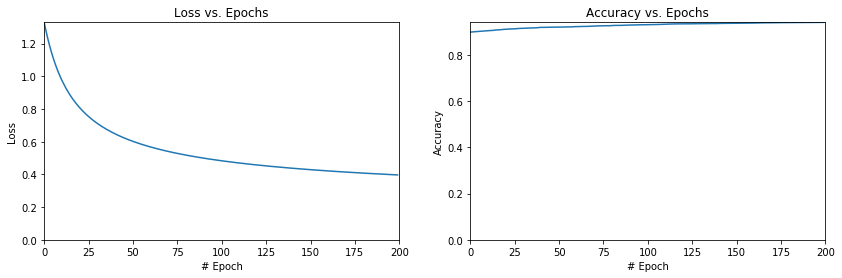

In [22]:
print("After {0:04d} epoch,  accuracy={1:.8f}".format(num_epochs,accuracy_score))
plt.figure(figsize=(14,4))

plt.subplot(1, 2, 1)
plt.axis([0,num_epochs,0,np.max(loss_epochs)])
plt.plot(loss_epochs)
plt.title('Loss vs. Epochs')
plt.xlabel('# Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.axis([0,num_epochs,0,np.max(accuracy_epochs)])
plt.plot(accuracy_epochs)
plt.title('Accuracy vs. Epochs')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')

plt.show()

# With MNIST dataset

## Get the MNIST data

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.join(
    datasetslib.datasets_root, 'mnist'), one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./datasets/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./datasets/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting ./datasets/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Simple MNIST Classification with Logistic Regression

In [28]:
num_outputs = 10  # 0-9 digits
num_inputs = 784  # total pixels

learning_rate = 0.001
num_epochs = 10
batch_size = 100
num_batches = int(mnist.train.num_examples/batch_size)

In [29]:
# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

# model paramteres
w = tf.Variable(tf.zeros([784, 10]), name="w")
b = tf.Variable(tf.zeros([10]), name="b")
print(w,b)

<tf.Variable 'w_3:0' shape=(784, 10) dtype=float32_ref> <tf.Variable 'b_3:0' shape=(10,) dtype=float32_ref>


In [30]:
model = tf.nn.softmax(tf.matmul(x, w) + b)

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

In [31]:
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        for batch in range(num_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            tfs.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracy_function = tf.reduce_mean(
            tf.cast(predictions_check, tf.float32))
        feed_dict = {x: mnist.test.images, y: mnist.test.labels}
        accuracy_score = tfs.run(accuracy_function, feed_dict)
        print("epoch {0:04d}  accuracy={1:.8f}".format(
            epoch, accuracy_score))

epoch 0000  accuracy=0.76230001
epoch 0001  accuracy=0.79479998
epoch 0002  accuracy=0.81330001
epoch 0003  accuracy=0.82220000
epoch 0004  accuracy=0.83130002
epoch 0005  accuracy=0.83700001
epoch 0006  accuracy=0.84160000
epoch 0007  accuracy=0.84539998
epoch 0008  accuracy=0.85030001
epoch 0009  accuracy=0.85329998


Let us repeat training with using two helping functions:

In [32]:
def mnist_batch_func(batch_size=100):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    return [batch_x, batch_y]


In [33]:
def tensorflow_classification(num_epochs, num_batches, batch_size,
                              batch_func, optimizer, test_x, test_y):
    accuracy_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
    with tf.Session() as tfs:
        tf.global_variables_initializer().run()
        for epoch in range(num_epochs):
            for batch in range(num_batches):
                batch_x, batch_y = batch_func(batch_size)
                feed_dict = {x: batch_x, y: batch_y}
                tfs.run(optimizer, feed_dict)
            predictions_check = tf.equal(
                tf.argmax(model, 1), tf.argmax(y, 1))
            accuracy_function = tf.reduce_mean(
                tf.cast(predictions_check, tf.float32))
            feed_dict = {x: test_x, y: test_y}
            accuracy_score = tfs.run(accuracy_function, feed_dict)
            accuracy_epochs[epoch] = accuracy_score
            print("epoch {0:04d}  accuracy={1:.8f}".format(
                epoch, accuracy_score))

    plt.figure(figsize=(14, 8))
    plt.axis([0, num_epochs, np.min(
        accuracy_epochs), np.max(accuracy_epochs)])
    plt.plot(accuracy_epochs, label='Accuracy Score')
    plt.title('Accuracy over Iterations')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

epoch 0000  accuracy=0.76249999
epoch 0001  accuracy=0.79400003
epoch 0002  accuracy=0.81250000
epoch 0003  accuracy=0.82279998
epoch 0004  accuracy=0.83109999
epoch 0005  accuracy=0.83690000
epoch 0006  accuracy=0.84140003
epoch 0007  accuracy=0.84539998
epoch 0008  accuracy=0.85070002
epoch 0009  accuracy=0.85399997
epoch 0010  accuracy=0.85759997
epoch 0011  accuracy=0.85979998
epoch 0012  accuracy=0.86250001
epoch 0013  accuracy=0.86409998
epoch 0014  accuracy=0.86580002
epoch 0015  accuracy=0.86699998
epoch 0016  accuracy=0.86909997
epoch 0017  accuracy=0.87029999
epoch 0018  accuracy=0.87220001
epoch 0019  accuracy=0.87390000
epoch 0020  accuracy=0.87480003
epoch 0021  accuracy=0.87580001
epoch 0022  accuracy=0.87730002
epoch 0023  accuracy=0.87800002
epoch 0024  accuracy=0.87849998
epoch 0025  accuracy=0.87889999
epoch 0026  accuracy=0.87970001
epoch 0027  accuracy=0.88059998
epoch 0028  accuracy=0.88120002
epoch 0029  accuracy=0.88200003


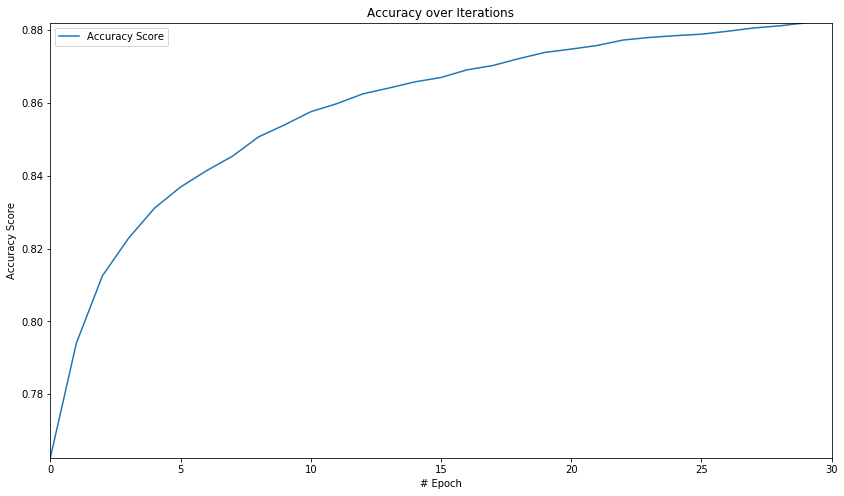

In [34]:
num_epochs=30
tensorflow_classification(num_epochs=num_epochs, 
                          num_batches=num_batches, 
                          batch_size=batch_size, 
                          batch_func=mnist_batch_func, 
                          optimizer=optimizer,
                          test_x=mnist.test.images,test_y=mnist.test.labels)